In [13]:
!pip install tabulate

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from tabulate import tabulate
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('SP 500 ESG Risk Ratings.csv')

In [16]:
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [17]:
df.shape

(503, 15)

In [18]:
summary_stats = df.describe().drop("count")

# Apply styling to the summary table
styled_stats = (
    summary_stats
    .style.background_gradient(axis=0, cmap="BuGn")  # Green gradient
    .set_properties(**{"text-align": "center"})       # Center-align text
    .set_table_styles([
        {"selector": "th", "props": [("background-color", "black"), ("color", "white")]}
    ])
    .set_caption(" Summary Statistics Overview")
)

styled_stats

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
mean,21.533721,5.739767,6.725116,9.070465,2.007444
std,6.889176,5.092421,2.208085,3.657924,0.793283
min,7.100000,0.000000,3.000000,0.800000,1.000000
25%,16.400000,1.800000,5.300000,6.700000,1.000000
50%,21.050000,4.050000,6.100000,8.900000,2.000000
75%,26.000000,8.950000,7.675000,11.200000,2.000000
max,41.700000,25.000000,19.400000,22.500000,5.000000


In [19]:
def check_dataframe(df):
    summary = []
    
    for col in df.columns:
        col_dtype = df[col].dtype
        total_instances = df[col].count()
        unique_values = df[col].nunique()
        null_values = df[col].isnull().sum()
        duplicate_rows = df.duplicated().sum()
        
        summary.append([
            col, col_dtype, total_instances, unique_values, null_values, duplicate_rows
        ])
    
    result_df = pd.DataFrame(
        summary,
        columns=["Column", "Data Type", "Instances", "Unique Values", "Nulls", "Duplicates"]
    )
    
    return result_df

# Remove rows with nulls in 'Sector' and 'Total ESG Risk score'
df_cleaned = df.dropna(subset=['Sector', 'Total ESG Risk score']).reset_index(drop=True)

print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

# Generate and style the data summary
styled_summary = (
    check_dataframe(df_cleaned)
    .style.background_gradient(axis=0, cmap="BuGn")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "black"), ("color", "white")]}])
    .set_caption("🔍 Data Overview Summary")
)

styled_summary

Shape of the cleaned dataset: (430, 15)


,Column,Data Type,Instances,Unique Values,Nulls,Duplicates
0,Symbol,object,430,430,0,0
1,Name,object,430,430,0,0
2,Address,object,430,430,0,0
3,Sector,object,430,11,0,0
4,Industry,object,430,110,0,0
5,Full Time Employees,object,426,345,4,0
6,Description,object,430,430,0,0
7,Total ESG Risk score,float64,430,213,0,0
8,Environment Risk Score,float64,430,146,0,0
9,Governance Risk Score,float64,430,91,0,0


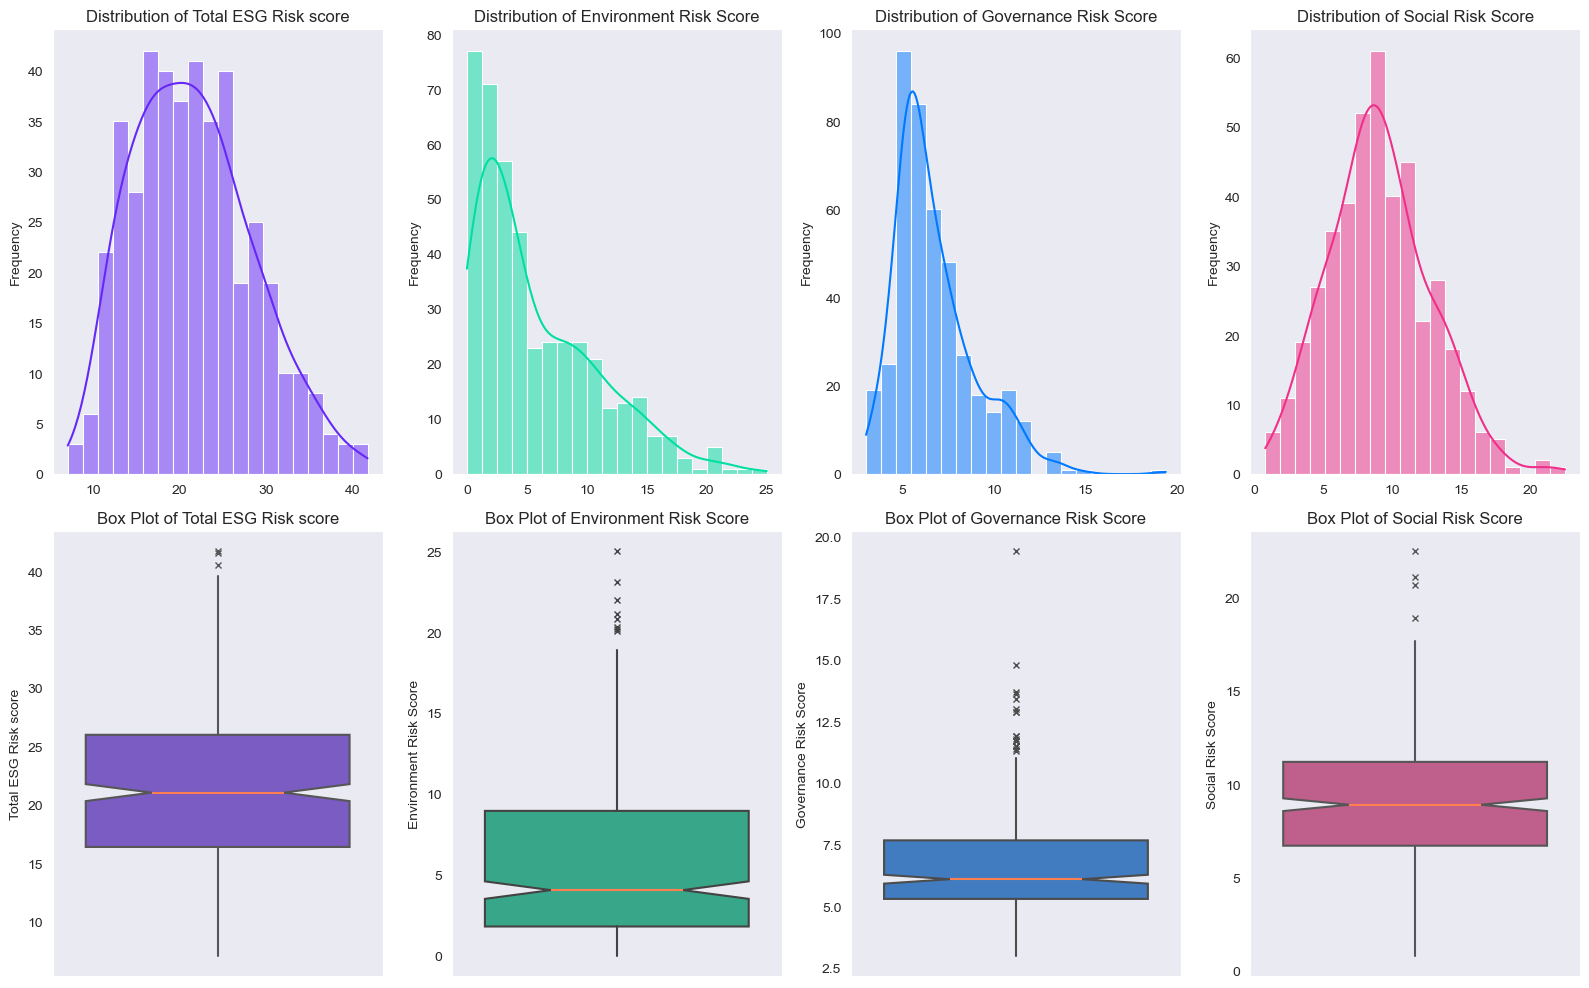

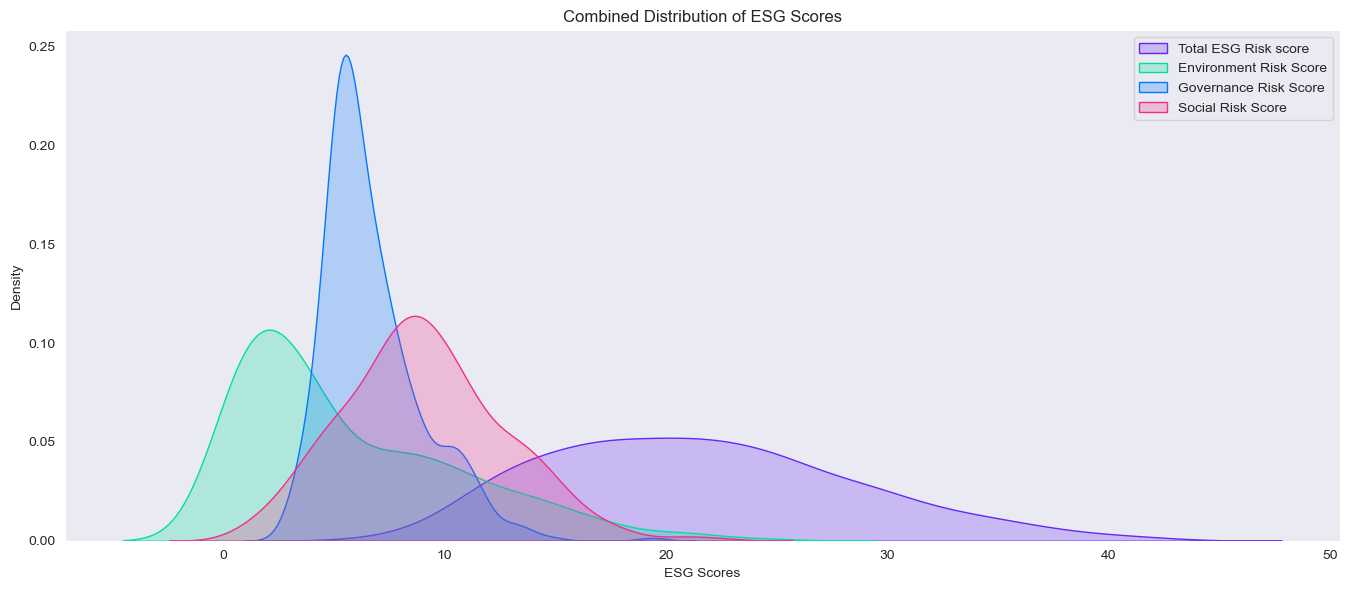


Outliers in Total ESG Risk score:
+-----+----------------------+------------------------+-----------------------+-------------------+
|     | Total ESG Risk score | Environment Risk Score | Governance Risk Score | Social Risk Score |
+-----+----------------------+------------------------+-----------------------+-------------------+
| 166 |         41.7         |          25.0          |          7.0          |        9.7        |
| 297 |         40.5         |          14.2          |         10.9          |       15.4        |
| 324 |         41.6         |          23.1          |          8.5          |       10.0        |
+-----+----------------------+------------------------+-----------------------+-------------------+

Outliers in Environment Risk Score:
+-----+----------------------+------------------------+-----------------------+-------------------+
|     | Total ESG Risk score | Environment Risk Score | Governance Risk Score | Social Risk Score |
+-----+---------------------

In [20]:
esg_cols = ['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']
esg_data = df[esg_cols]

colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]
sns.set_style("dark")

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Loop through columns for histograms and boxplots
for i, col in enumerate(esg_cols):
    color = colors[i]

    # Histogram with KDE
    sns.histplot(esg_data[col], bins=20, kde=True, ax=axes[0, i], color=color)
    axes[0, i].set_title(f'Distribution of {col}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(y=esg_data[col], ax=axes[1, i], color=color,
                saturation=0.5, notch=True, showcaps=False,
                flierprops={"marker": "x"}, medianprops={"color":"coral"})
    axes[1, i].set_title(f'Box Plot of {col}')
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Combined KDE plot
plt.figure(figsize=(13.6, 6))
for i, col in enumerate(esg_cols):
    sns.kdeplot(esg_data[col], label=col, fill=True, color=colors[i])
    
plt.title("Combined Distribution of ESG Scores")
plt.xlabel("ESG Scores")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Outlier Detection using IQR
outliers = {}
for col in esg_cols:
    Q1 = esg_data[col].quantile(0.25)
    Q3 = esg_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_df = esg_data[(esg_data[col] < lower) | (esg_data[col] > upper)]
    outliers[col] = outliers_df

# Display outliers
for col, df_out in outliers.items():
    print(f"\nOutliers in {col}:")
    if df_out.empty:
        print("None found.")
    else:
        print(tabulate(df_out, headers='keys', tablefmt='pretty'))

In [21]:
data_no_outliers = df.copy()
Esg_scores = df[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# Identify and remove outliers
for col in Esg_scores.columns:
    Q1 = Esg_scores[col].quantile(0.25)
    Q3 = Esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower_bound) & (data_no_outliers[col] <= upper_bound)]

# Reset the index of the new DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)

# Display the shape of the new dataset without outliers
print(f"Shape of the dataset without outliers: {data_no_outliers.shape}")

Shape of the dataset without outliers: (397, 15)


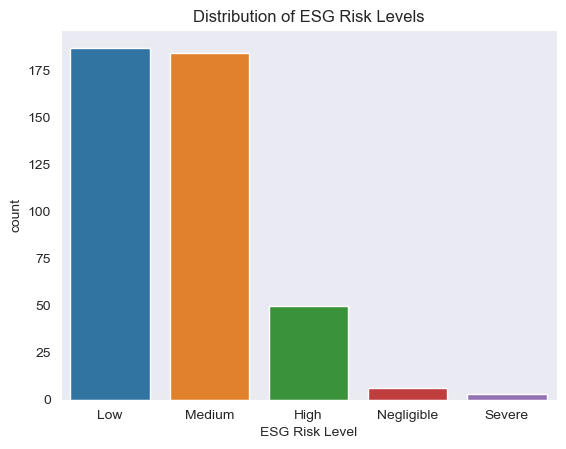

In [22]:
sns.countplot(data=df, x='ESG Risk Level', order=df['ESG Risk Level'].value_counts().index)
plt.title("Distribution of ESG Risk Levels")
plt.show()

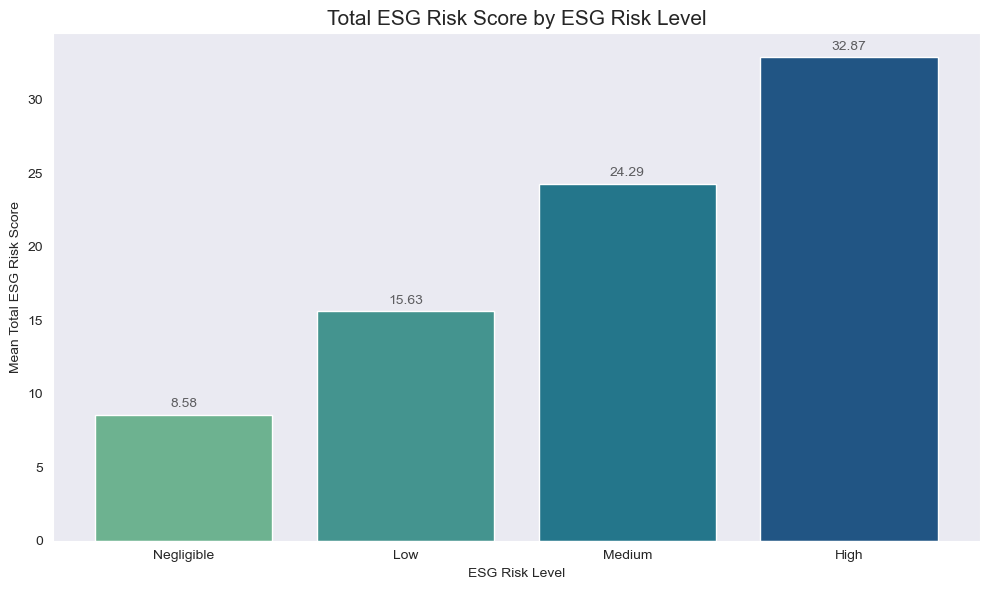

In [49]:
risk_levels = ['Negligible', 'Low', 'Medium', 'High']

# Group and filter based on risk levels
grouped_data = (
    data_no_outliers
    .groupby('ESG Risk Level', observed=True)['Total ESG Risk score']
    .mean()
    .reindex(risk_levels)  # Ensures order
    .reset_index()
)

# Set style and color palette
sns.set_style("dark")
palette = sns.color_palette("crest", len(risk_levels))

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color = palette)

# Titles and labels
ax.set_title('Total ESG Risk Score by ESG Risk Level', fontsize=15)
ax.set_xlabel('ESG Risk Level')
ax.set_ylabel('Mean Total ESG Risk Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, color='black', alpha=0.6)


plt.tight_layout()
plt.show()

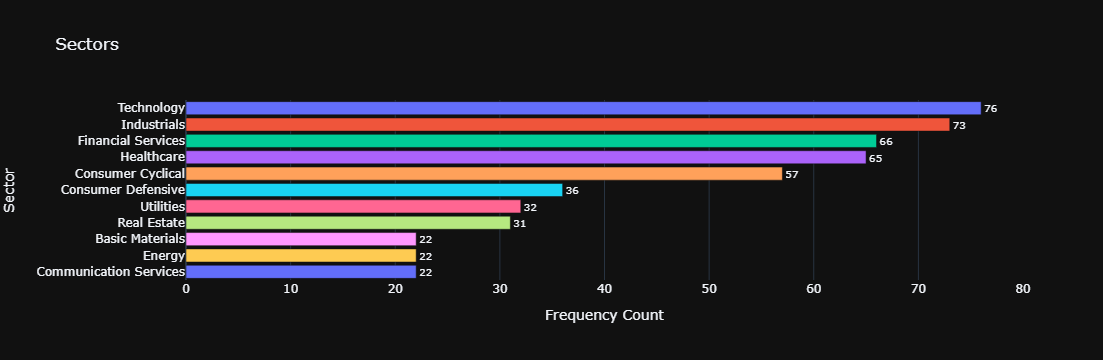

In [61]:
sector_counts = df['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(sector_counts, x='Frequency', y='Sector', orientation='h', 
             title='Sectors', text='Frequency',
             labels={'Frequency': 'Frequency Count', 'Sector': 'Sector'},
             color='Sector', color_continuous_scale= px.colors.sequential.Viridis_r,
            template='plotly_dark')

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

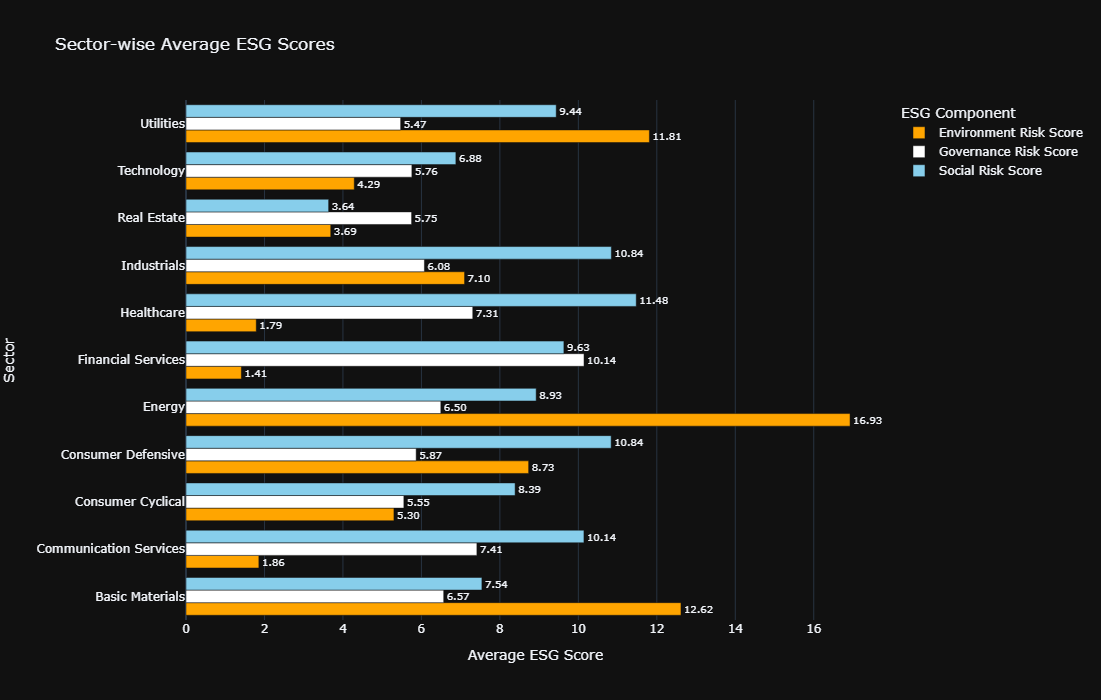

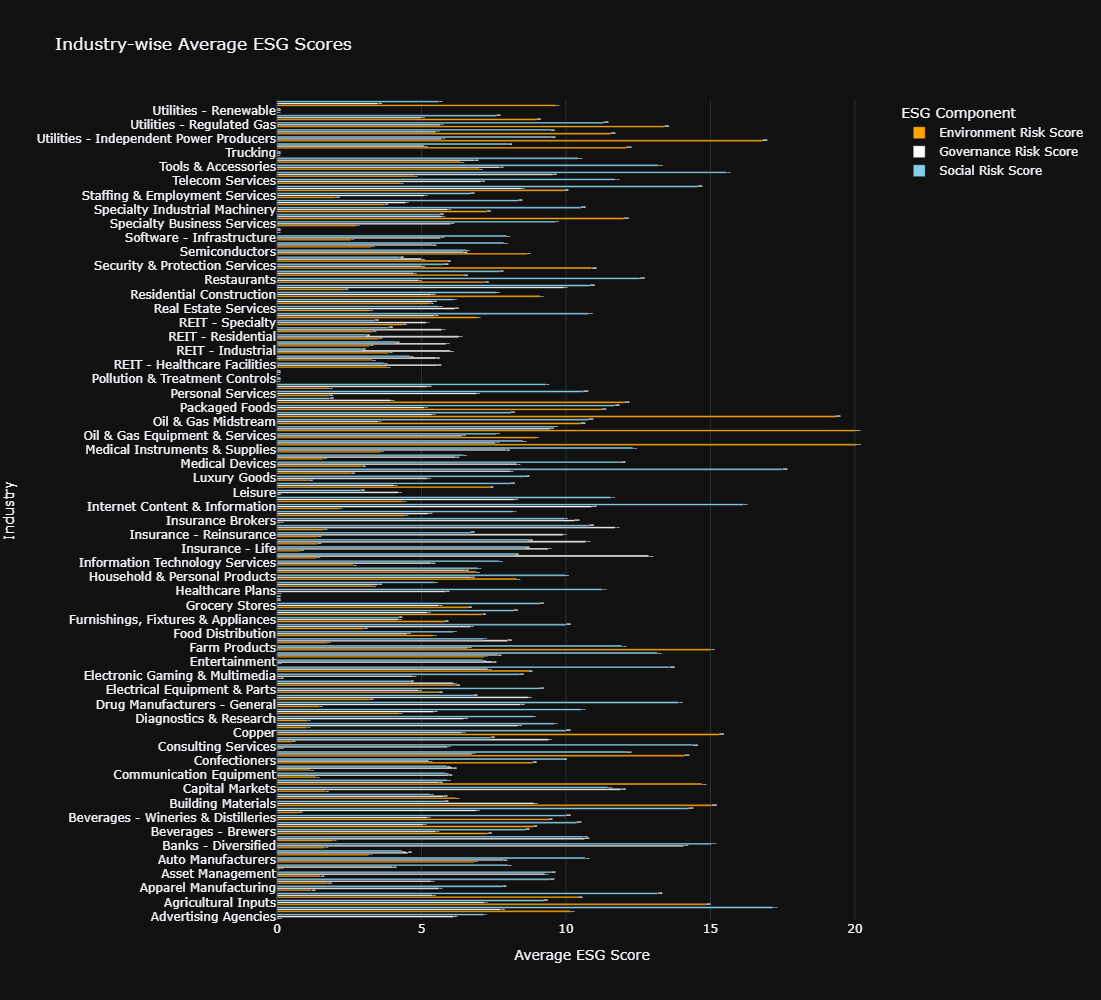

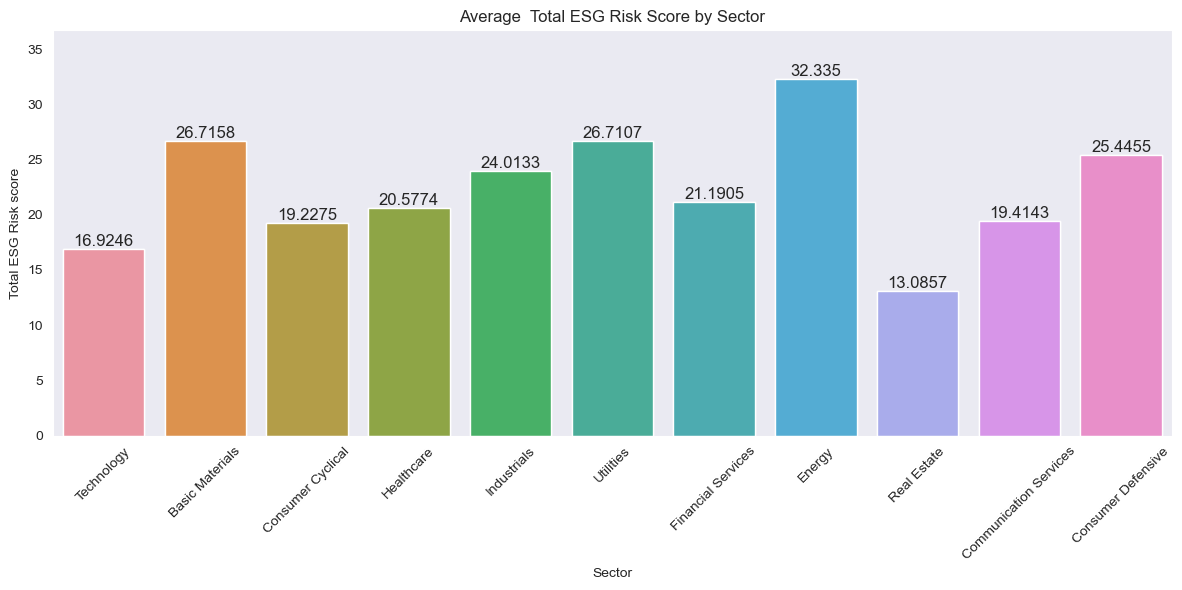

In [25]:
# Calculate sector-wise average ESG scores
sector_avg_scores = df.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Melt the DataFrame to long format(unpivot) for proper Plotly bar chart rendering
sector_long = sector_avg_scores.melt(id_vars='Sector', 
                                     value_vars=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                                     var_name='ESG Component', 
                                     value_name='Average Score')

# Industry-wise average scores
industry_avg_scores = df.groupby('Industry')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

industry_long = industry_avg_scores.melt(id_vars='Industry',
                                         value_vars=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                                         var_name='ESG Component', 
                                         value_name='Average Score')

# Define custom colors for ESG components
custom_colors = {
    'Environment Risk Score': "#FFA500",
    'Governance Risk Score': "#FFFFFF",
    'Social Risk Score': "#87CEEB"
}

# --- Sector-wise ESG Bar Chart ---
fig_sector = px.bar(
    sector_long,
    x='Average Score',
    y='Sector',
    color='ESG Component',
    orientation='h',
    title='Sector-wise Average ESG Scores',
    color_discrete_map=custom_colors,
    template='plotly_dark',
    width=1000,
    height=700,
    text='Average Score'
)

fig_sector.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_sector.update_layout(barmode='group', xaxis_title='Average ESG Score', yaxis_title='Sector')
fig_sector.show()

# --- Industry-wise ESG Bar Chart ---
fig_industry = px.bar(
    industry_long,
    x='Average Score',
    y='Industry',
    color='ESG Component',
    orientation='h',
    title='Industry-wise Average ESG Scores',
    color_discrete_map=custom_colors,
    template='plotly_dark',
    width=1000,
    height=1000,
    text='Average Score'
)

fig_industry.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_industry.update_layout(barmode='group', xaxis_title='Average ESG Score', yaxis_title='Industry')
fig_industry.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Sector', y='Total ESG Risk score', estimator=np.mean, errorbar=None)
ax = sns.barplot(x='Sector', y='Total ESG Risk score', data=df, errwidth=0)
ax.bar_label(ax.containers[0], fontsize = 12)

plt.xticks(rotation=45)
plt.title("Average  Total ESG Risk Score by Sector")
plt.tight_layout()
plt.show()

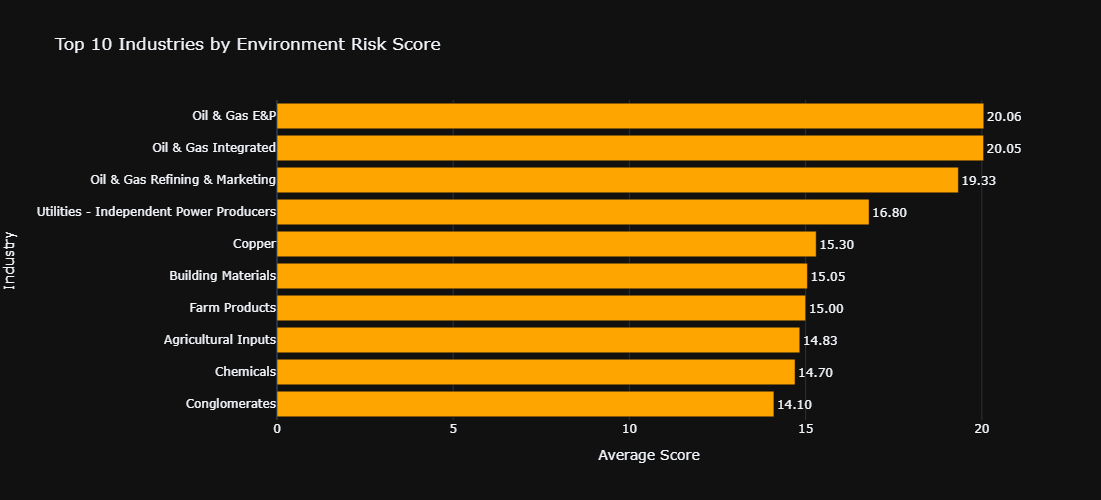

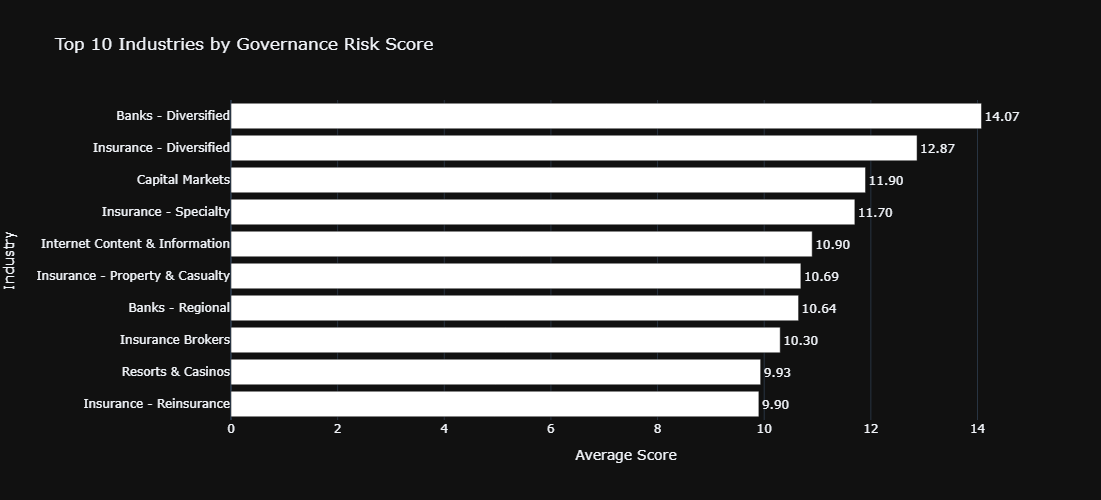

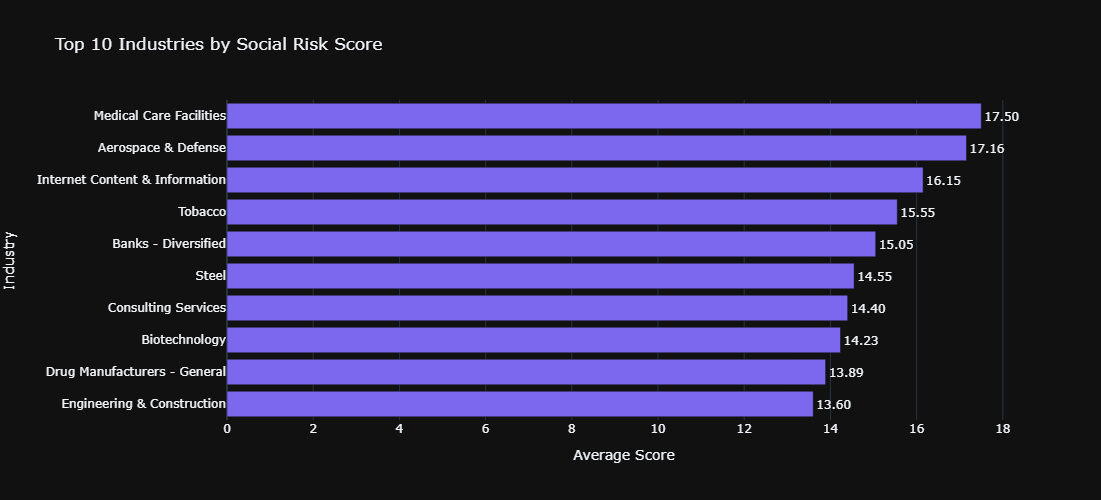

In [26]:
# Calculate industry-wise average ESG scores
industry_avg_scores = df.groupby('Industry')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Define custom colors
custom_colors = {
    'Environment Risk Score': "#FFA500",
    'Governance Risk Score': "#FFFFFF",
    'Social Risk Score': "#7b68ee"
}

# Top 10 industries by each ESG component
top_env = industry_avg_scores.nlargest(10, 'Environment Risk Score')
top_gov = industry_avg_scores.nlargest(10, 'Governance Risk Score')
top_soc = industry_avg_scores.nlargest(10, 'Social Risk Score')

# Plot for Environment Risk Score
fig_env = px.bar(
    top_env.sort_values(by='Environment Risk Score', ascending=True),
    x='Environment Risk Score',
    y='Industry',
    orientation='h',
    title='Top 10 Industries by Environment Risk Score',
    color_discrete_sequence=[custom_colors['Environment Risk Score']],
    text='Environment Risk Score',
    template='plotly_dark',
    width=900,
    height=500
)
fig_env.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_env.update_layout(xaxis_title='Average Score', yaxis_title='Industry')
fig_env.show()

# Plot for Governance Risk Score
fig_gov = px.bar(
    top_gov.sort_values(by='Governance Risk Score', ascending=True),
    x='Governance Risk Score',
    y='Industry',
    orientation='h',
    title='Top 10 Industries by Governance Risk Score',
    color_discrete_sequence=[custom_colors['Governance Risk Score']],
    text='Governance Risk Score',
    template='plotly_dark',
    width=900,
    height=500
)
fig_gov.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_gov.update_layout(xaxis_title='Average Score', yaxis_title='Industry')
fig_gov.show()

# Plot for Social Risk Score
fig_soc = px.bar(
    top_soc.sort_values(by='Social Risk Score', ascending=True),
    x='Social Risk Score',
    y='Industry',
    orientation='h',
    title='Top 10 Industries by Social Risk Score',
    color_discrete_sequence=[custom_colors['Social Risk Score']],
    text='Social Risk Score',
    template='plotly_dark',
    width=900,
    height=500
)
fig_soc.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_soc.update_layout(xaxis_title='Average Score', yaxis_title='Industry')
fig_soc.show()

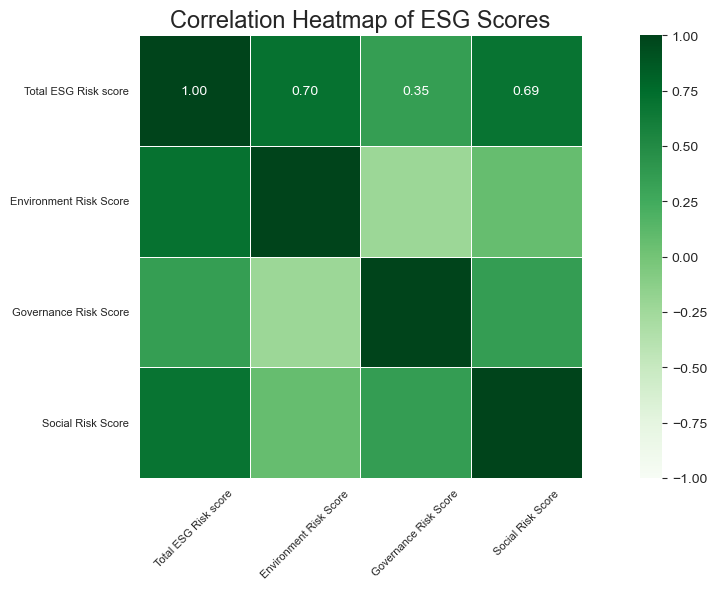

In [63]:
plt.figure(figsize=(12, 6))
sns.set_style("dark")

# Create the correlation matrix
corr = Esg_scores.corr()

sns.heatmap(corr, cmap='Greens', annot=True, fmt=".2f", cbar=True, linewidths=0.5, square=True, vmin=-1, vmax=1)

plt.title("Correlation Heatmap of ESG Scores", fontsize=17)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

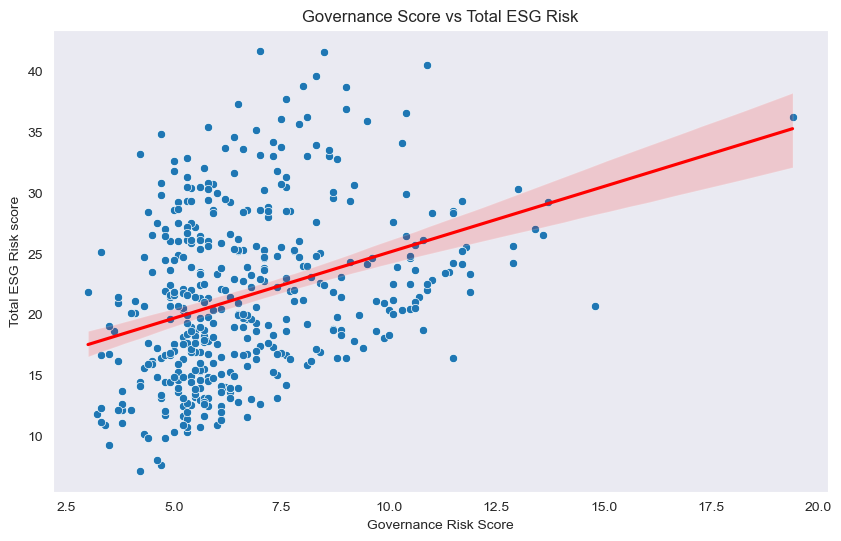

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Governance Risk Score', y='Total ESG Risk score')
sns.regplot(data=df, x='Governance Risk Score', y='Total ESG Risk score', scatter=False, color='red')
plt.title("Governance Score vs Total ESG Risk")
plt.show()